In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
df = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [12]:
df.index.freq="MS"

In [13]:
hw=ExponentialSmoothing(df["Passengers"],initialization_method='legacy-heuristic',trend='add',seasonal='add',seasonal_periods=12)

In [14]:
res=hw.fit()

In [15]:
df["HoltWinter"]=res.fittedvalues

<AxesSubplot:xlabel='Month'>

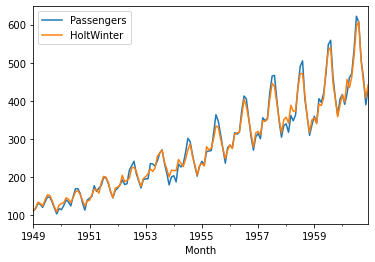

In [16]:
df[["Passengers","HoltWinter"]].plot()

In [7]:
N_test = 12
train=df.iloc[:-N_test]
test=df.iloc[-N_test:]

In [17]:
train_idx=df.index <=train.index[-1]
test_idx=df.index >train.index[-1]

In [18]:
hw=ExponentialSmoothing(train["Passengers"],initialization_method='legacy-heuristic',trend='add',seasonal='add',seasonal_periods=12)
res=hw.fit()

In [19]:
df.loc[train_idx,"HoltWinter"]=res.fittedvalues
df.loc[test_idx,"HoltWinter"]=res.forecast(N_test)

<AxesSubplot:xlabel='Month'>

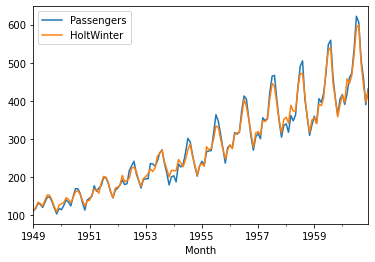

In [20]:
df[["Passengers","HoltWinter"]].plot()

In [21]:
def rmse(y,t):
    return np.sqrt(np.mean((y-t)**2))

In [22]:
def mae(y,t):
    return np.mean(np.abs(y-t))

In [23]:
print("Train RMSE : ", rmse(train["Passengers"],res.fittedvalues))
print("Test RMSE : " ,rmse(test["Passengers"],res.forecast(N_test)))

Train RMSE :  11.62468035075608
Test RMSE :  16.980018018225735


In [25]:
print("Train MAE : ", mae(train["Passengers"],res.fittedvalues))
print("Test MAE : " ,mae(test["Passengers"],res.forecast(N_test)))

Train MAE :  9.008297532175344
Test MAE :  13.380634093871597


In [27]:
hw=ExponentialSmoothing(train["Passengers"],initialization_method='legacy-heuristic',trend='add',seasonal='mul',seasonal_periods=12)
res=hw.fit()
df.loc[train_idx,"HoltWinter"]=res.fittedvalues
df.loc[test_idx,"HoltWinter"]=res.forecast(N_test)

<AxesSubplot:xlabel='Month'>

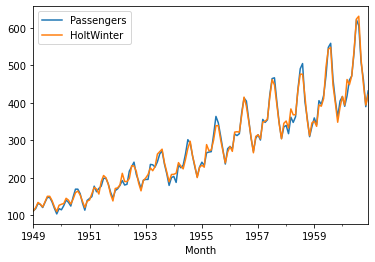

In [29]:
df[["Passengers","HoltWinter"]].plot()

In [30]:
print("Train RMSE : ", rmse(train["Passengers"],res.fittedvalues))
print("Test RMSE : " ,rmse(test["Passengers"],res.forecast(N_test)))

Train RMSE :  9.767995213885278
Test RMSE :  15.810796169813436


In [31]:
print("Train MAE : ", mae(train["Passengers"],res.fittedvalues))
print("Test MAE : " ,mae(test["Passengers"],res.forecast(N_test)))

Train MAE :  7.604235637590574
Test MAE :  10.30360376452044


In [33]:
hw=ExponentialSmoothing(train["Passengers"],initialization_method='legacy-heuristic',trend='mul',seasonal='mul',seasonal_periods=12)
res=hw.fit()
df.loc[train_idx,"HoltWinter"]=res.fittedvalues
df.loc[test_idx,"HoltWinter"]=res.forecast(N_test)

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
df[["Passengers","HoltWinter"]].plot()

In [34]:
print("Train RMSE : ", rmse(train["Passengers"],res.fittedvalues))
print("Test RMSE : " ,rmse(test["Passengers"],res.forecast(N_test)))

Train RMSE :  9.617924944626594
Test RMSE :  25.806590190295957


In [35]:
print("Train MAE : ", mae(train["Passengers"],res.fittedvalues))
print("Test MAE : " ,mae(test["Passengers"],res.forecast(N_test)))

Train MAE :  7.1122938096665855
Test MAE :  20.844768798588206
